# Simple Linear Regression

## Introduction


For this project, we are analyzing a small business' historical marketing promotion data with a focus on the use of influencer marketing. We will explore the relationship between marketing promotional budgets and sales. The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns.

Project Tasks include:

- Creating and fitting a model
- Checking model assumptions
- Analyzing model performance
- Interpreting model coefficients
- Communicating the results


## Step 1: Import Packages

In [4]:

# Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the statsmodel module.
import statsmodels.api as sm

# Import the ols function from statsmodels.
from statsmodels.formula.api import ols


### Load the dataset

In [2]:

# Import the dataset 
data = pd.read_csv('marketing_and_sales_data_evaluate_lr.csv')

# Display the first five rows.
data.head(5)


,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


## Step 2: Data Exploration


### Data Features

The features in the data are:

* TV promotion budget (in millions of dollars)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)

Each row corresponds to an independent marketing promotion where the business invests in `TV`, `Social_Media`, and `Radio` promotions to increase `Sales`.


In [3]:

# Display the number of rows and columns

data.shape


(4572, 4)

In [6]:

# Generate descriptive statistics about TV, Radio, and Social_Media.

data[['TV', 'Radio', 'Social_Media']].describe()


,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


## Check for and address missing values

In [15]:

# Display the percentage of missing values in the Sales column

# Calculate the average missing rate in the sales column.
missing_sales = data['Sales'].isna().mean()
missing_sales

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal place.
missing_sales = round(missing_values * 100, 2)
missing_sales

# Display the results
print("{:.2%}".format(missing_values))


0.13%



0.13% of rows are missing sales


In [7]:

# Remove all rows in the data from which Sales is missing

# Subset the data to include rows where Sales are present
data = data.dropna(subset = ['Sales'], axis = 0)


### Visualize the sales distribution

Text(0.5, 1.0, 'Distribution of Sales')

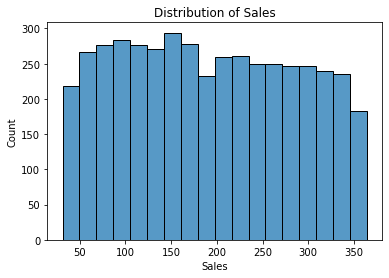

In [8]:

# Create a histogram of the Sales.

#data['Sales'].hist()
fig = sns.histplot(data['Sales'])

# Add a title
fig.set_title("Distribution of Sales")



Generally, Sales are equally distributed between 25 and 350 million dollars. 


## Step 3: Model Building

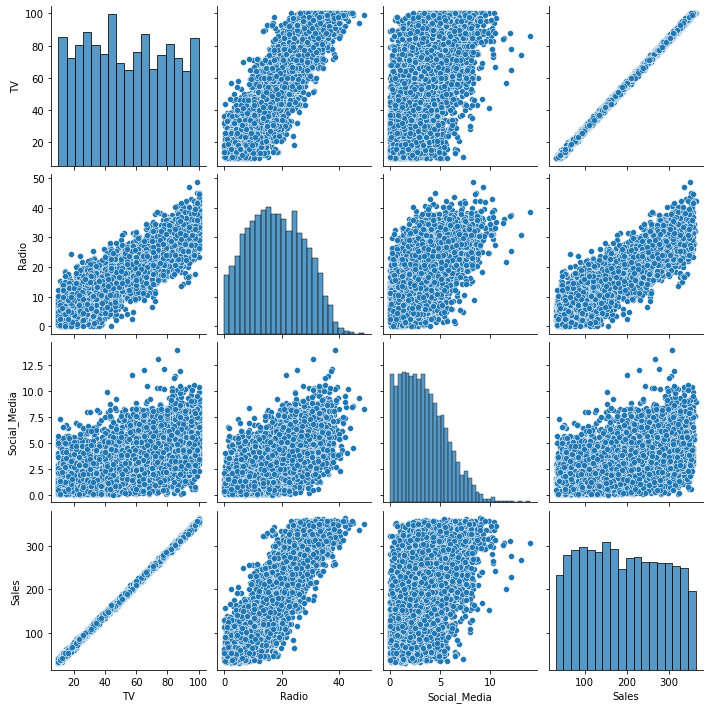

In [9]:

# Create a pairplot of the data.

sns.pairplot(data)



TV has the strongest linear relationship with Sales. Radio & Sales appear to have a linear relationship, but there is larger variance than between TV & Sales.


### Build and fit the model

In [10]:

# Define the OLS formula.
ols_formula = ('Sales ~ TV')

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        19:09:17   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check model assumptions

### Model Assumption: Linearity

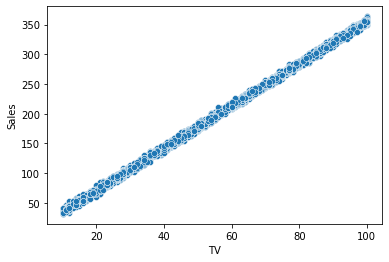

In [11]:

# Create a scatterplot comparing X and Sales (Y).

x = data['TV']
y = data['Sales']

#plt.scatter(x, y)
sns.scatterplot(x, y)



There is a clear linear relationship between TV and Sales, meeting the linearity assumption.


### Model Assumption: Independence


The independence assumption is not violated as each marketing promotion is independent from one another.


### Model Assumption: Normality

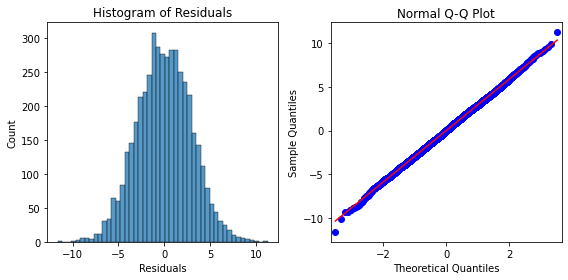

In [12]:

# Calculate the residuals.
residuals = model.resid

# Create a 1x2 plot figures.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 
sns.histplot(residuals, ax = axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residuals")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line = 's', ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal Q-Q Plot")

plt.tight_layout()

# Show the plot.
plt.show()



The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model.The residuals in the Q-Q plot form a straight line, further supporting that the normality assumption is met.


### Model Assumption: Homoscedasticity

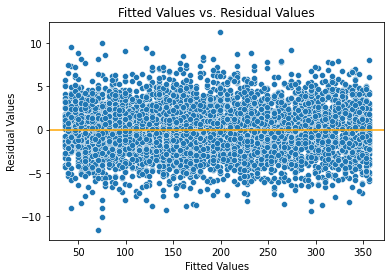

In [13]:

# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x-axis label.
fig.set_xlabel("Fitted Values")

# Set the y-axis label.
fig.set_ylabel("Residual Values")

# Set the title.
fig.set_title("Fitted Values vs. Residual Values")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0, color = 'orange')

# Show the plot.
plt.show()


The variance of the residuals is consistant across all $X$, meeting the assumption of homoscedasticity.



## Step 4: Results and Evaluation



### Display the OLS regression results


In [51]:

# Display the model results

model_results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        20:50:59   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


TV explains 99.9% of variation in Sales


### Interpret the model results


When `TV` is used as the independent variable X, the coefficient for the Intercept is -0.1263 & the coefficient for TV is 3.5614



When `TV` is used as the independent variable X, the relationship between X and `Sales` as a linear equation is:

$Y = \text{Intercept} + \text{Slope} * X$

$\text{Sales (in millions)} = \text{Intercept} + \text{Slope} *\text{TV (in millions)}$

$\text{Sales (in millions)} = -0.1263 + 3.5614 * \text{TV (in millions)}$



According to the model, when `TV` is used as the independent variable X, an increase of one million dollars for the TV promotional budget results in an estimated 3.5614 million dollars more in sales.


### Measure the uncertainty of the coefficient estimates

In [52]:

# Display the model results

model_results


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Fri, 03 May 2024   Prob (F-statistic):               0.00
Time:                        20:50:59   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


When TV is used as the independent variable, it has a p-value of 0.000 and a 95% confidence interval of [3.558,3.565]. This means there is a 95% chance the interval [3.558,3.565] contains the true parameter value of the slope. These results indicate little uncertainty in the estimation of the slope of X. Therefore, the business can be confident in the impact TV has on Sales.



## Results Summary



Of the three available promotion types (TV, radio, and social media), TV has the strongest positive linear relationship with sales. According to the model, an increase of one million dollars for the TV promotional budget will result in an estimated 3.5614 million dollars more in sales.



## Recommendations



- Explore estimated sales given different TV promotional budgets
- Using both TV and Radio as independent variables

The next step is to build a multiple linear regressions model to estimate sales given different TV promotional budgets.


#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).

Dale, D.,Droettboom, M., Firing, E., Hunter, J. (n.d.). [*Matplotlib.Pyplot.Axline — Matplotlib 3.5.0 Documentation*](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.axline.html). 